In [1]:
# %load dsfs/visualize.py
from typing import List, Dict
from collections import Counter

import math
import matplotlib.pyplot as plt

from dsfs.matrix import Matrix, make_matrix
from dsfs.stats import correlation


def bucketize(point: float, bucket_size: float) -> float:
    return bucket_size * math.floor(point/bucket_size)


def make_histogram(points: List[float], bucket_size: float ) -> Dict[float, int]:
    return Counter(bucketize(point, bucket_size=bucket_size) for point in points)


def plot_histogram(points: List[float], bucket_size:float, title: str = ''):
    histogram = make_histogram(points, bucket_size=bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()


def correlation_matrix(data: Matrix) -> Matrix:
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])

    return make_matrix(len(data), len(data), correlation_ij)


def plot_correlation_matrix(corr_data: Matrix):
    num_vectors = len(corr_data)
    fig, ax = plt.subplots(num_vectors, num_vectors)
    for i in range(num_vectors):
        for j in range(num_vectors):
            if i != j:
                ax[i][j].scatter(corr_data[j], corr_data[i])
            else:
                ax[i][j].annotate(f'series {i}', (0.5,0.5), xycoords='axes fraction', ha='center', va='center')
            if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
            if j < num_vectors - 1: ax[i][j].yaxis.set_visible(False)
    ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
    ax[0][0].set_ylim(ax[0][1].get_ylim())


0.1316885523130605

57.556430007559875

0.1411157913208008

57.39097856770662

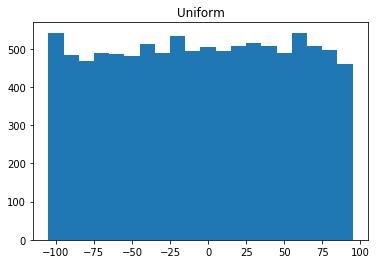

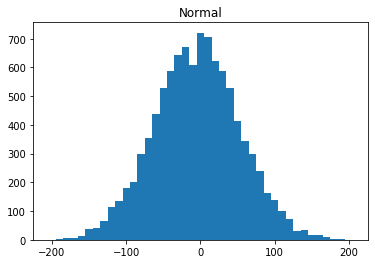

In [2]:
import random
from dsfs.probs import inverse_normal_cdf
from dsfs.stats import mean, standard_deviation, correlation
random.seed(0)
uniform = [200 * random.random() - 100 for _ in range(10000)]
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

display(mean(uniform), standard_deviation(uniform))
display(mean(normal), standard_deviation(normal))

plot_histogram(uniform, 10, 'Uniform')
plot_histogram(normal, 10, "Normal")

In [3]:
def random_normal():
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

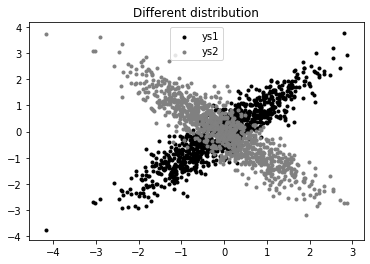

In [4]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.legend(loc=9)
plt.title('Different distribution')
plt.show()


In [5]:
display(correlation(xs, ys1))
display(correlation(xs, ys2))

0.9010493686379609

-0.8920981526880033

In [6]:
display(correlation_matrix([xs, ys1]))
display(correlation_matrix([xs, ys2]))

[[1.0, 0.9010493686379609], [0.9010493686379609, 1.0]]

[[1.0, -0.8920981526880033], [-0.8920981526880033, 1.0]]

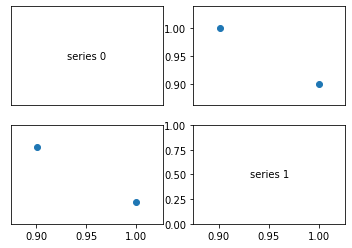

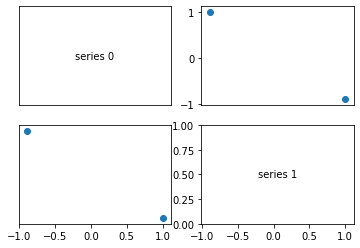

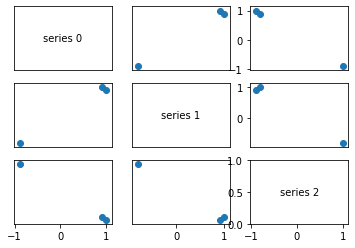

In [7]:
plot_correlation_matrix(correlation_matrix([xs, ys1]))
plot_correlation_matrix(correlation_matrix([xs, ys2]))
plot_correlation_matrix(correlation_matrix([xs, ys1, ys2]))

In [10]:
from dsfs.matrix import scale, rescale
matrix = [
    [-3, -1, 1],
    [-1,  0, 1],
    [ 1,  1, 1]
]
means, stddevs = scale(matrix)
assert means == [-1, 0, 1]
assert stddevs == [2, 1, 0]

rescaled_matrix = rescale(matrix)
display(rescaled_matrix)
scaled_means, scaled_stddevs = scale(rescaled_matrix)
assert scaled_means == [0, 0, 1]
assert scaled_stddevs == [1, 1, 0]

[[-1.0, -1.0, 1], [0.0, 0.0, 1], [1.0, 1.0, 1]]